In [1]:
import numpy as np
import torch
import prosail

# x = np.load('C:/Users/USER/Downloads/prosailpython-torchport/prosailpython-torchport/tests/data/prosail_params.npy')

In [ ]:
import torch
import prosail

# Import your `run_prosail` function from your module if needed:
# from your_module import run_prosail

# Define batch size
batch_size = 5000  # Testing with 10 samples

# Generate random test inputs
N = torch.rand(batch_size) * 2.5 + 1.2  # Between 1.2 and 3.7
cab = torch.rand(batch_size) * 60 + 20   # Between 20 and 80
car = torch.rand(batch_size) * 15 + 5    # Between 5 and 20
cbrown = torch.rand(batch_size) * 2      # Between 0 and 2
cw = torch.rand(batch_size) * 0.015 + 0.005  # Between 0.005 and 0.02
cm = torch.rand(batch_size) * 0.015 + 0.005  # Between 0.005 and 0.02
lai = torch.rand(batch_size) * 6 + 2     # Between 2 and 8
lidfa = torch.rand(batch_size) * 30      # Between 0 and 30
hspot = torch.rand(batch_size) * 0.5     # Between 0 and 0.5
rsoil = torch.rand(batch_size) * 0.3 + 0.1  # Between 0.1 and 0.4
psoil = torch.rand(batch_size) * 0.4 + 0.1  # Between 0.1 and 0.5
tts = torch.rand(batch_size) * 60        # Between 0 and 60 degrees
tto = torch.rand(batch_size) * 60        # Between 0 and 60 degrees
psi = torch.rand(batch_size) * 180       # Between 0 and 180 degrees

# Fix shape mismatches
N = N.view(-1, 1)
cab = cab.view(-1, 1)
car = car.view(-1, 1)
cbrown = cbrown.view(-1, 1)
cw = cw.view(-1, 1)
cm = cm.view(-1, 1)
lai = lai.view(-1, 1)
lidfa = lidfa.view(-1, 1)
hspot = hspot.view(-1, 1)
rsoil = rsoil.view(-1, 1)
psoil = psoil.view(-1, 1)
tts = tts.view(-1, 1)
tto = tto.view(-1, 1)
psi = psi.view(-1, 1)

# Call the function with test inputs
try:
    output = prosail.run_prosail(
        N, cab, car, cbrown, cw, cm, lai, lidfa, hspot, rsoil, psoil, tts, tto, psi,
        factor="SDR",  # Choosing SDR as the return type
        init_spectra=True  # Assuming spectra are already initialized
    )
    
    print("✅ run_prosail executed successfully!")
    print("Output shape:", output.shape)  # Should be (batch_size, num_wavelengths)
    print("Sample output:", output[:5])  # Print first 5 samples

except Exception as e:
    print("❌ run_prosail encountered an error:")
    print(e)


✅ run_prosail executed successfully!
Output shape: torch.Size([5000, 2101])
Sample output: tensor([[0.0270, 0.0270, 0.0270,  ..., 0.0162, 0.0161, 0.0161],
        [0.0335, 0.0335, 0.0335,  ..., 0.0191, 0.0190, 0.0191],
        [0.0268, 0.0268, 0.0268,  ..., 0.0148, 0.0148, 0.0148],
        [0.0377, 0.0377, 0.0377,  ..., 0.0328, 0.0325, 0.0326],
        [0.0304, 0.0305, 0.0305,  ..., 0.0349, 0.0347, 0.0348]])


In [7]:
import torch
import prosail

# --- Optional: For reproducibility
torch.manual_seed(42)

# --- If you want to use GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# --- Batch size
batch_size = 1000

# --- Generate random parameters directly in Nx1 shape
N      = torch.rand((batch_size, 1), device=device) * 2.5 + 1.2
cab    = torch.rand((batch_size, 1), device=device) * 60 + 20
car    = torch.rand((batch_size, 1), device=device) * 15 + 5
cbrown = torch.rand((batch_size, 1), device=device) * 2
cw     = torch.rand((batch_size, 1), device=device) * 0.015 + 0.005
cm     = torch.rand((batch_size, 1), device=device) * 0.015 + 0.005
lai    = torch.rand((batch_size, 1), device=device) * 6 + 2
lidfa  = torch.rand((batch_size, 1), device=device) * 30
hspot  = torch.rand((batch_size, 1), device=device) * 0.5
rsoil  = torch.rand((batch_size, 1), device=device) * 0.3 + 0.1
psoil  = torch.rand((batch_size, 1), device=device) * 0.4 + 0.1
tts    = torch.rand((batch_size, 1), device=device) * 60
tto    = torch.rand((batch_size, 1), device=device) * 60
psi    = torch.rand((batch_size, 1), device=device) * 180

# --- Call run_prosail
try:
    # For the first call, we set init_spectra=True; 
    # if you do repeated calls, consider setting init_spectra=False for the rest.
    output = prosail.run_prosail(
        N, cab, car, cbrown, cw, cm, lai, lidfa, hspot, rsoil, psoil,
        tts, tto, psi,
        factor="SDR",
        init_spectra=True
    )
    
    # The output should have shape [batch_size, num_wavelengths]
    print("✅ run_prosail executed successfully!")
    print("Output shape:", output.shape)
    print("Sample output (first 5):\n", output[:5])

except Exception as e:
    print("❌ run_prosail encountered an error:")
    print(e)


Using device: cpu
✅ run_prosail executed successfully!
Output shape: torch.Size([1000, 2101])
Sample output (first 5):
 tensor([[0.0248, 0.0248, 0.0248,  ..., 0.0246, 0.0244, 0.0244],
        [0.0285, 0.0285, 0.0284,  ..., 0.0521, 0.0518, 0.0517],
        [0.0336, 0.0337, 0.0337,  ..., 0.0418, 0.0414, 0.0417],
        [0.0302, 0.0301, 0.0300,  ..., 0.0536, 0.0532, 0.0533],
        [0.0290, 0.0291, 0.0291,  ..., 0.0487, 0.0483, 0.0487]])


In [8]:
output[0].shape

torch.Size([2101])

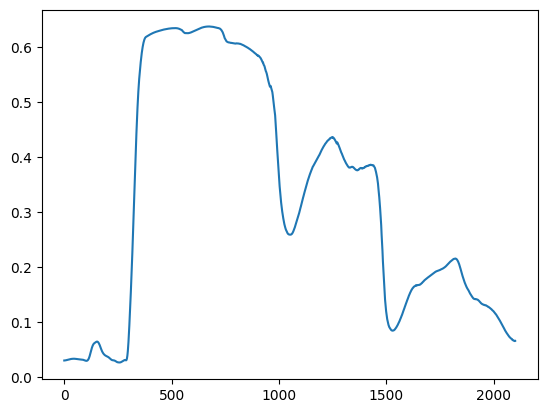

In [10]:
import matplotlib.pyplot as plt
plt.plot(output[500])

In [49]:
rr.shape

torch.Size([100, 2101])

In [19]:
import torch

def prosail_reconstruct(predicted_latent, other_params):
    """
    predicted_latent: (batch_size, 3) -> [lai, cab, cw]
    other_params:     (batch_size, 9) -> [n, car, cbrown, cm, lidfa, lidfb, rsoil, psoil, hspot]
    
    Returns reflectance with shape: (batch_size, num_waves)
    """
    # Split out
    lai = predicted_latent[:, 0].unsqueeze(-1)
    cab = predicted_latent[:, 1].unsqueeze(-1)
    cw  = predicted_latent[:, 2].unsqueeze(-1)

    n      = other_params[:, 0].unsqueeze(-1)
    car    = other_params[:, 1].unsqueeze(-1)
    cbrown = other_params[:, 2].unsqueeze(-1)
    cm     = other_params[:, 3].unsqueeze(-1)
    lidfa  = other_params[:, 4].unsqueeze(-1)
    # lidfb  = other_params[:, 5].unsqueeze(-1)
    rsoil  = other_params[:, 6].unsqueeze(-1)
    psoil  = other_params[:, 7].unsqueeze(-1)
    hspot  = other_params[:, 8].unsqueeze(-1)

    # Fix geometry for consistency
    tts = torch.full_like(n, 30.0)
    tto = torch.full_like(n, 0.0)
    psi = torch.full_like(n, 0.0)
    # typelidf = 1 is integer, might have to pass as shape Nx1 int or just keep it default
    # typelidf = torch.twos_like(n, dtype=torch.int32)

    # Run PROSAIL in batch
    reflectance = prosail.run_prosail(
        n, cab, car, cbrown, cw, cm, lai,
        lidfa, hspot, rsoil, psoil,
        tts, tto, psi,
        factor="SDR",
        init_spectra=True  # Typically only do init_spectra=True once to save overhead
    )
    return reflectance[:, :10]  # shape: (batch_size, wavebands)


def test_prosail_reconstruct():
    # Suppose we have a batch size of 5
    # predicted_latent (batch_size=5, 3) -> [lai, cab, cw]
    predicted_latent = torch.tensor([
        [3.0, 60.0, 0.01],
        [2.5, 70.0, 0.015],
        [2.8, 55.0, 0.02],
        [3.1, 65.0, 0.01],
        [2.2, 50.0, 0.015]
    ], dtype=torch.float)

    # other_params (batch_size=5, 9) -> [n, car, cbrown, cm, lidfa, lidfb, rsoil, psoil, hspot]
    other_params = torch.tensor([
        [1.5,  10.0, 0.5,  0.01,  -0.3,  0.2, 0.2,  0.3,  0.05],
        [1.8,  12.0, 1.0,  0.02,   0.4, -0.3, 0.1,  0.2,  0.00],
        [1.6,   8.0, 0.7,  0.01,   0.5,  0.5, 0.15, 0.25, 0.05],
        [1.3,  14.0, 0.1,  0.015,  0.2, -0.1, 0.3,  0.4,  0.02],
        [1.1,   9.0, 0.2,  0.009,  0.1,  0.4, 0.2,  0.35, 0.03]
    ], dtype=torch.float)

    # Call the reconstruction
    reflectance = prosail_reconstruct(predicted_latent, other_params)
    
    # Print results
    print("Output shape:", reflectance.shape)
    print("Sample output (first 2):\n", reflectance[:2])
    return reflectance
# Run the test
reflectance = test_prosail_reconstruct()


Output shape: torch.Size([5, 10])
Sample output (first 2):
 tensor([[0.0242, 0.0242, 0.0243, 0.0243, 0.0243, 0.0244, 0.0245, 0.0245, 0.0246,
         0.0247],
        [0.0203, 0.0203, 0.0203, 0.0204, 0.0204, 0.0205, 0.0205, 0.0206, 0.0206,
         0.0207]])


In [18]:
reflectance.shape

torch.Size([5, 2101])

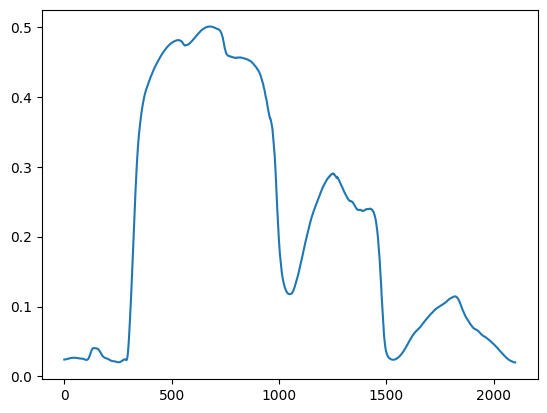

In [15]:
plt.plot(reflectance[0])